In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt



C:\Users\xVEXx\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


HVAC Control Output: 63.62%


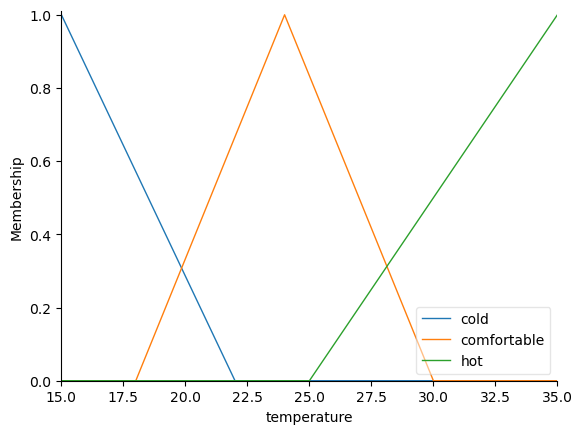

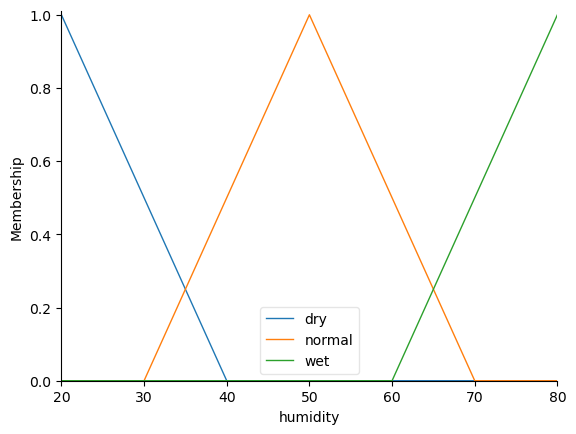

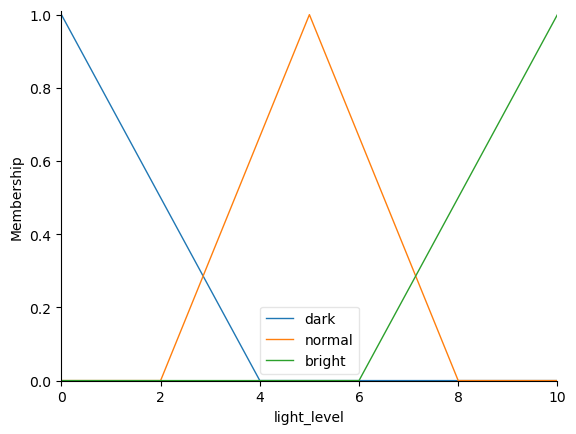

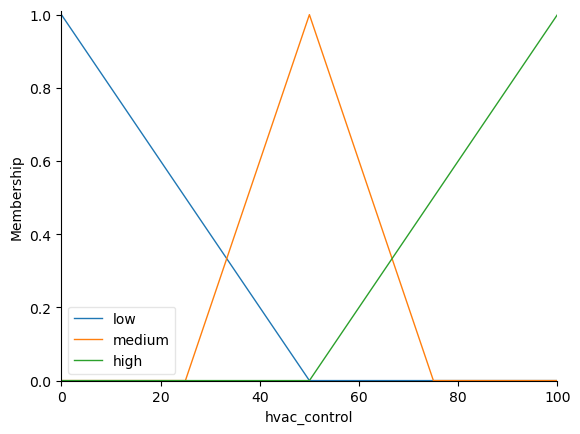

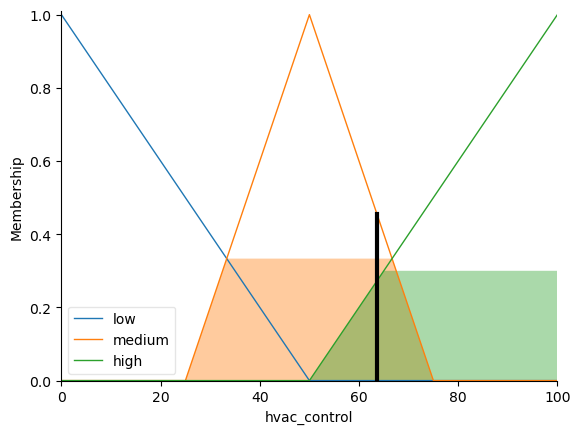

In [3]:

# --- 1. Define Inputs and Outputs ---
# Input variables
temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')  # Temperature: 15°C to 35°C
humidity = ctrl.Antecedent(np.arange(20, 81, 1), 'humidity')        # Humidity: 20% to 80%
light_level = ctrl.Antecedent(np.arange(0, 11, 1), 'light_level')   # Light Level: 0 (Dark) to 10 (Bright)

# Output variable
hvac_control = ctrl.Consequent(np.arange(0, 101, 1), 'hvac_control')  # HVAC Control: 0% to 100% effort

# --- 2. Define Membership Functions ---
# Temperature
temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 22])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [18, 24, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 35, 35])

# Humidity
humidity['dry'] = fuzz.trimf(humidity.universe, [20, 20, 40])
humidity['normal'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['wet'] = fuzz.trimf(humidity.universe, [60, 80, 80])

# Light Level
light_level['dark'] = fuzz.trimf(light_level.universe, [0, 0, 4])
light_level['normal'] = fuzz.trimf(light_level.universe, [2, 5, 8])
light_level['bright'] = fuzz.trimf(light_level.universe, [6, 10, 10])

# HVAC Control
hvac_control['low'] = fuzz.trimf(hvac_control.universe, [0, 0, 50])
hvac_control['medium'] = fuzz.trimf(hvac_control.universe, [25, 50, 75])
hvac_control['high'] = fuzz.trimf(hvac_control.universe, [50, 100, 100])

# Visualize membership functions
temperature.view()
humidity.view()
light_level.view()
hvac_control.view()

# --- 3. Define Fuzzy Rules ---
rule1 = ctrl.Rule(temperature['cold'] & humidity['dry'], hvac_control['low'])
rule2 = ctrl.Rule(temperature['comfortable'] & humidity['normal'], hvac_control['medium'])
rule3 = ctrl.Rule(temperature['hot'] | humidity['wet'], hvac_control['high'])
rule4 = ctrl.Rule(light_level['dark'], hvac_control['high'])
rule5 = ctrl.Rule(light_level['bright'], hvac_control['low'])

# --- 4. Create and Simulate the Fuzzy Controller ---
# Combine the rules
hvac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])

# Simulate the controller
hvac_simulation = ctrl.ControlSystemSimulation(hvac_ctrl)

# Provide input values
hvac_simulation.input['temperature'] = 28  # Example temperature: 28°C
hvac_simulation.input['humidity'] = 50     # Example humidity: 50%
hvac_simulation.input['light_level'] = 3   # Example light level: Dark (3)

# Compute the output
hvac_simulation.compute()

# Print and visualize the result
print(f"HVAC Control Output: {hvac_simulation.output['hvac_control']:.2f}%")

# Plot output membership with the computed result
hvac_control.view(sim=hvac_simulation)
plt.show()